# Predicting Listing Gains in the Indian IPO Market Using TensorFlow

In this project, we will simulate the role of an investment firm looking to invest in Initial Public Offerings (IPOs) in the Indian market. Our goal is to develop a deep learning classification model that predicts whether an IPO will experience listing gains. The dataset we will use is sourced from [moneycontrol](https://www.moneycontrol.com/ipo/listed-ipos/) and contains historical data on past IPOs in India.

The descriptions of each column in the dataset are:

`Date`: date when the IPO was listed

`IPOName`: name of the IPO

`Issue_Size`: size of the IPO issue, in INR Crores

`Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category

`Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category

`Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category

`Subscription_Total`: total number of times the IPO was subscribed overall

`Issue_Price`: the price in INR at which the IPO was issued

`Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

Let's go ahead and import some libraries we'll be using and explore the data.

# Exploring the Data

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Reading in the data
ipo = pd.read_csv('Indian_IPO_Market_Data.csv')

In [3]:
# Shape of the data and displaying first and last 5 rows
print(ipo.shape)
ipo

(319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24


There are 319 rows and 9 columns. `Listing_Gains_Percent` is our target variable.

In [4]:
# Checking for missing data and dtypes
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


There are no missing data and the dtypes seem to check out for each column.

In [5]:
# Checking statistics for target variable
ipo['Listing_Gains_Percent'].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [6]:
# Checking statistics for each column
ipo.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


Based on our descriptive statistics, we can exclude the `Date` and `IPOName` columns as they contain a high number of unique values that won't contribute significant value to our model. Additionally, we’ve identified some outliers in the dataset, particularly in relation to standard deviations, which we will address later. Another point of concern is whether instances where `Issue_Size` and `Issue_Price` are both zero represent valid data, or if they correspond to IPOs with a size of less than 1 INR Crore (10 million rupees).

Before proceeding, let's first modify the values in our target variable to fit a classification model. If the listing gains percentage is greater than zero, we’ll code it as `1` (indicating a listing gain). If the listing gains percentage is zero or negative, we’ll code it as `0` (indicating no listing gains).

In [7]:
# Replacing values with 0 or 1 
ipo['Listing_Gains_Percent'] = ipo['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)

In [8]:
# Distribution percentages of target variable
round(ipo['Listing_Gains_Percent'].value_counts(normalize=True) * 100, 2)

1    54.55
0    45.45
Name: Listing_Gains_Percent, dtype: float64

About 54.55% of IPO's are listed as a profit.

In [9]:
# Renaming target variable
ipo = ipo.rename(columns={'Listing_Gains_Percent': 'Listing_Gains'})

ipo

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,0
...,...,...,...,...,...,...,...,...,...
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,1
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,1
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,0
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,1


In [10]:
# Issue_Size when equal to 0
ipo[ipo['Issue_Size'] == 0]

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains
4,19/02/10,Thangamayil,0.0,0.52,1.52,2.26,1.12,75,0
41,08/10/10,Electrosteel St,0.0,5.86,28.58,6.19,8.23,11,1
102,06/12/12,Tara Jewels,0.0,1.49,3.10,2.05,1.98,230,0
282,15/11/21,Sigachi Ind,0.0,42.15,78.82,41.26,49.56,163,1


In [11]:
# Issue_Price when equal to 0
ipo[ipo['Issue_Price'] == 0]

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains
202,04/04/18,Mishra Dhatu Ni,438.38,1.96,0.12,0.72,1.21,0,0
216,08/05/19,Neogen,131.48,30.49,113.88,16.06,41.18,0,0


The instances where both `Issue_Size` and `Issue_Price` are equal to zero appear to be valid, as they could represent IPOs with a total issue size of less than 1 INR Crore.

Let's drop `Date` and `IPOName` columns and move on to outlier detection.

In [12]:
# Dropping 'Date' and 'IPOName'
ipo = ipo.drop(['Date ', 'IPOName'], axis=1)

ipo.head(2)

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains
0,189.8,48.44,106.02,11.08,43.22,165,1
1,328.7,59.39,51.95,3.79,31.11,145,0


# Outlier Treatment

For checking ouliers, we are going to check the skewness value of each of the features. A value outside of the range -1 to 1 indicates there are outliers. We'll also visualize the outliers using a boxplot. 

Issue_Size: 4.85

Subscription_QIB: 2.14

Subscription_HNI: 3.08

Subscription_RII: 3.71

Subscription_Total: 2.91

Issue_Price: 1.7



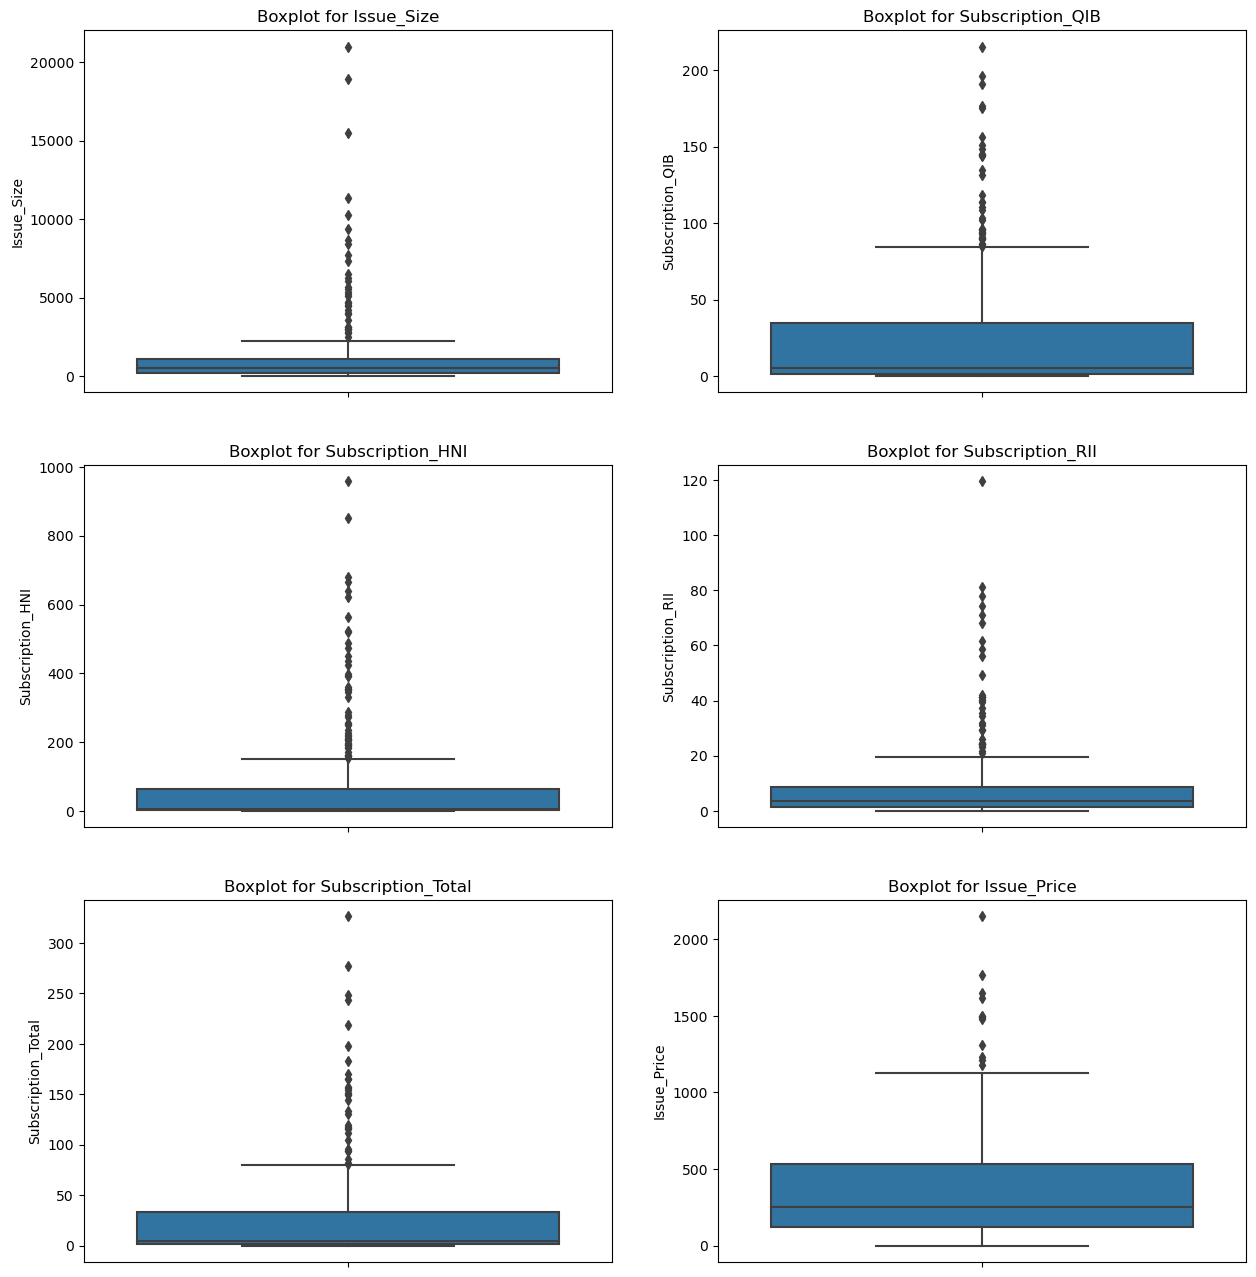

In [13]:
# Features for outlier detection 
features = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
            'Subscription_RII', 'Subscription_Total', 'Issue_Price']

# Checking skewness value of each feature
for col in features:
    print(f'{col}: {round(ipo[col].skew(),2)}\n')

# Figure size
fig = plt.figure(figsize=(15, 16))

# Boxplots by looping through each feature using enumerate for each subplot
for i, col in enumerate(features):
    ax = plt.subplot(3, 2, i+1)
    sns.boxplot(y=ipo[col], ax=ax)
    plt.title(f'Boxplot for {col}')

According to our skewness values, all features have a value outside of the range -1 to 1 indicating the presence of outliers. Our boxplots confirm this showing outliers as the dots above the upper bound lines. 

To optimize the efficiency of our model, we will replace outliers in each feature with the respective upper bound value. This approach preserves the representation of the highest values in the data while effectively "scaling down" the outliers, preventing them from disproportionately affecting the model during training and evaluation. 

In [14]:
# Calculating upper and lower bounds using IQR and replacing outliers
for col in features:

    # Calculating interquartile range (iqr)
    q1 = ipo[col].quantile(q=0.25)
    q3 = ipo[col].quantile(q=0.75)  
    iqr = q3 - q1 
    
    # calculating lower and upper bound lines
    lower = (q1 - 1.5 * iqr)
    upper = (q3 + 1.5 * iqr)
    
    # Replacing outliers with their respective bound lines using clip
    ipo[col] = ipo[col].clip(lower, upper)

Issue_Size: 1.22

Subscription_QIB: 1.26

Subscription_HNI: 1.18

Subscription_RII: 1.13

Subscription_Total: 1.29

Issue_Price: 1.08



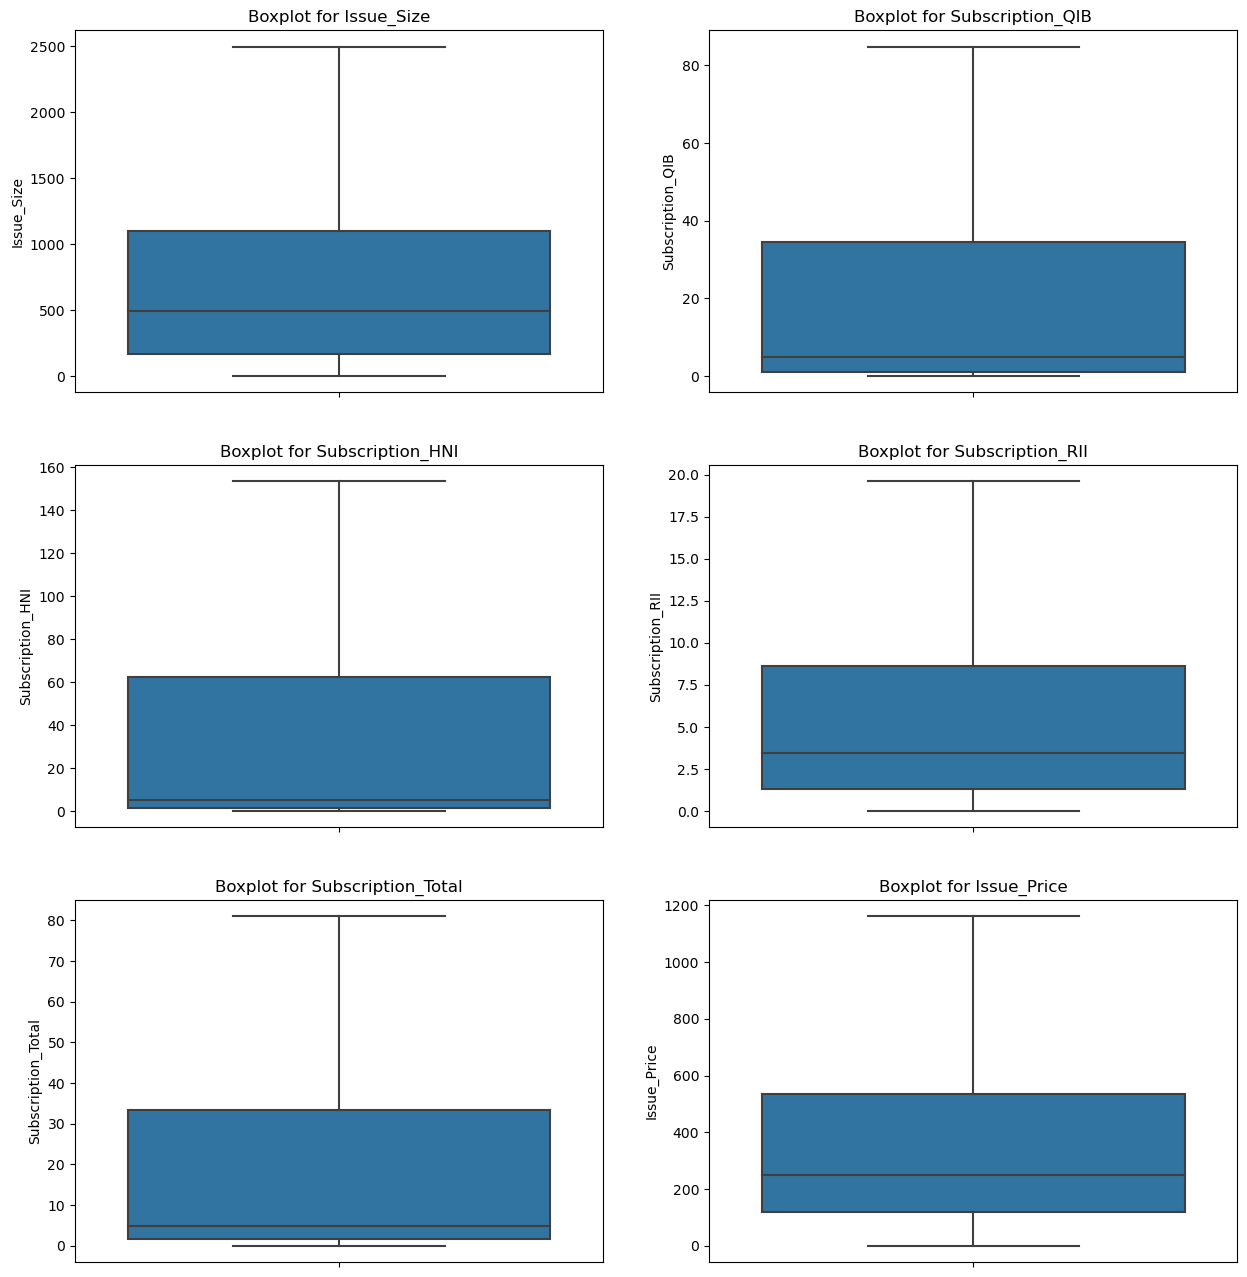

In [15]:
# Evaulating the skewness values and boxplot again
for col in features:
    print(f'{col}: {round(ipo[col].skew(),2)}\n')

# Figure size
fig = plt.figure(figsize=(15, 16))

# Boxplots by looping through each feature using enumerate for each subplot
for i, col in enumerate(features):
    ax = plt.subplot(3, 2, i+1)
    sns.boxplot(y=ipo[col], ax=ax)
    plt.title(f'Boxplot for {col}')

While the skewness values are close, they still fall outside the ideal range of -1 to 1. However, based on our boxplots, there are no remaining outliers. Therefore, using the IQR-based imputation method is sufficient for our purposes.

Let's proceed and check out the relationships our features have with our target variable.

# Visualizing Correlations with "Listing_Gains"

Text(0.5, 1.0, "Feature Correlations with 'Listing_Gain'")

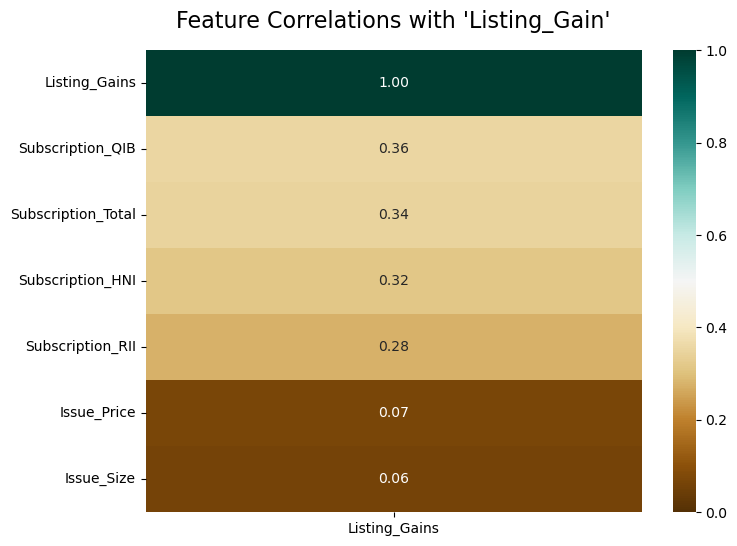

In [29]:
## Heatmap to see what correlates with Listing_Gains

# correlations using absolute value
correlations = abs(ipo.corr())

# Figure size
plt.figure(figsize=(8,6))

# Feature correlations with Listing_Gain in descending order
heatmap = sns.heatmap(correlations[['Listing_Gains']].sort_values(by='Listing_Gains', ascending=False), 
            vmin=0, vmax=1, annot=True, fmt='.2f', cmap='BrBG')

# Sets title, size and location
heatmap.set_title("Feature Correlations with 'Listing_Gain'", fontdict={'fontsize':16}, pad=16)

All the "Subscription" features correlate the best with Listing Gains. Issue Size and Issue Price have a weak correlation with Listing Gains.

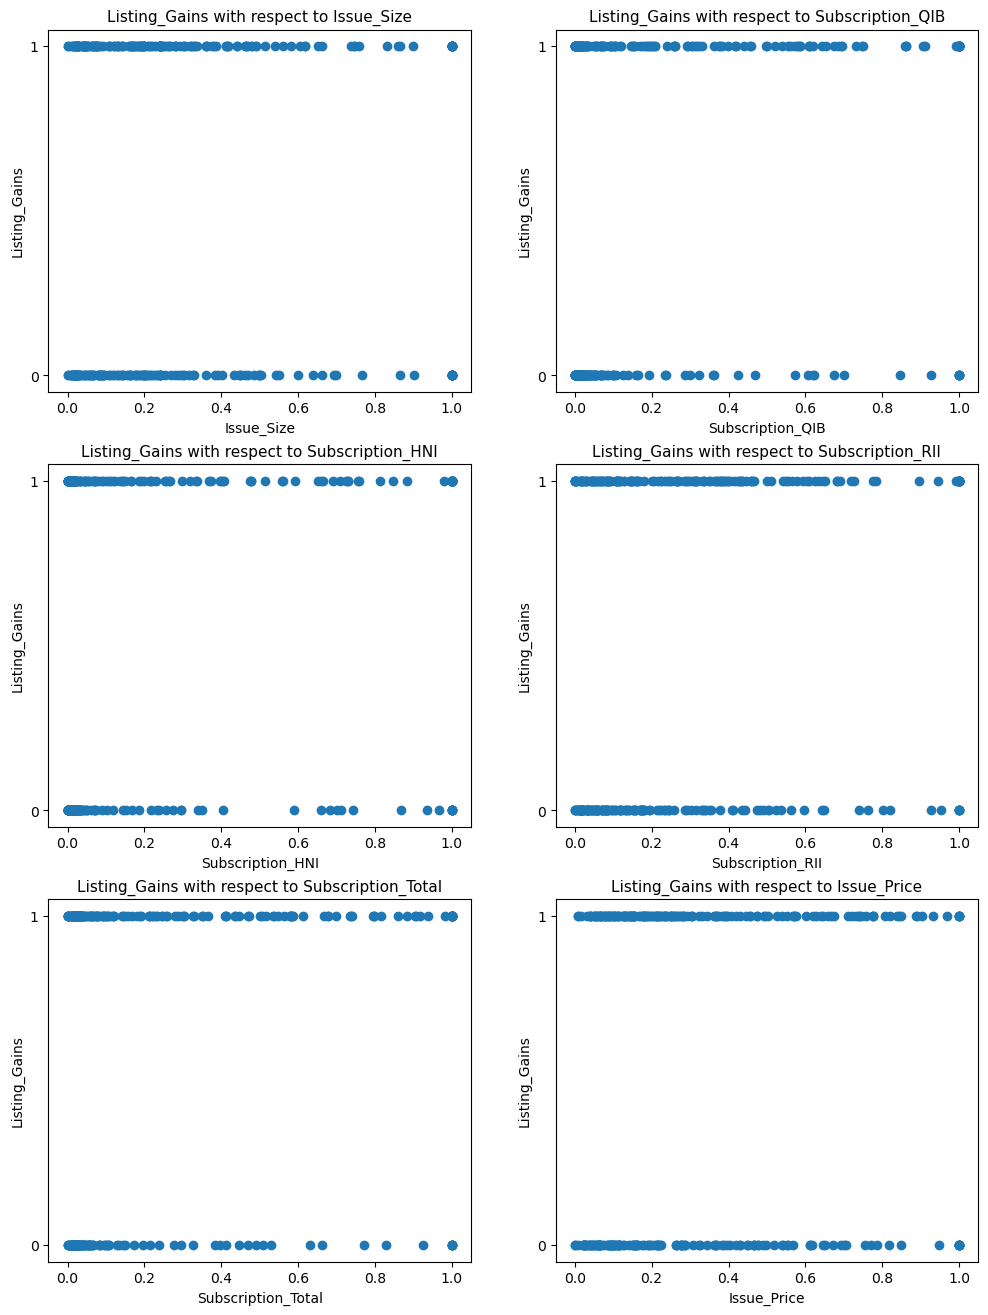

In [31]:
## Scatter plot of Listing_Gains with respect to features

# Figure size
plt.figure(figsize=(12, 16))

# Looping thru features using enumerate for subplots
for i, col in enumerate(features):
    
    # Subplot
    plt.subplot(3, 2, i+1)
    
    # Scatterplot
    plt.scatter(data=ipo, x=col, y='Listing_Gains')
    
    # Formated title and axis labels
    plt.title(f'Listing_Gains with respect to {col}', size=11)
    plt.xlabel(col)
    plt.ylabel('Listing_Gains')
    
    # Y-axis tick labels
    plt.yticks([0,1])

There's not a feature relationship with Listing Gains that immediately sticks out.  `Subscription_Total` and `Subscription_QIB` tend to have more listing gains than not as subscriptions increase.

# Setting Up the Model

Before we can get into instatiating our deep learning model using TensorFlow, we need to:
* create arrays for our predictors and target variable so we can use TensorFlow
* scale the predictors to improve performance and efficiency
* and split the data into training and test sets to check model performance on unseen data

In [18]:
# Predictor array and target variable array 
target_variable = ['Listing_Gains'] 
predictors = list(set(list(ipo.columns)) - set(target_variable))

# Scaling predictors
ipo[predictors] = ipo[predictors] / ipo[predictors].max()

# Check scaling
ipo.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.311793,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.268853,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.102454,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.215239,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.461472,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Splitting data into training and test sets
X = ipo[predictors].values
y = ipo[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Training set size: (223, 6)
Test set size: (96, 6)


In [30]:
# Target variable split count for each set
unique, count = np.unique(y_train, return_counts=True)
print(f'y_train class split {count[0]} : {count[1]}')

unique, count = np.unique(y_test, return_counts=True)
print(f'y_test class split {count[0]} : {count[1]}')

y_train class split 100 : 123
y_test class split 45 : 51


Our training set has 223 observations and the test set has 96 observations. Our target variable training set has a fair split of 100 to 123 (no lisitng gains to having lising gains) and the test set has a fair split of 45 to 51. 

Let's proceed to building our model.

# Building the Deep Learning Classification Model

We're going to build our deep learning classification model using TensorFlow's Function API. We will first be defining our model, then compiling and fitting the model, and finally evaluating our model on the training and test sets. Let's get started!

In [21]:
# Setting random seed to get consistent results
tf.random.set_seed(1)

# Defining deep learning model with functional API
input_layer = tf.keras.Input(shape=(X_train.shape[1],))

hidden_layer1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
drop1 = tf.keras.layers.Dropout(rate=0.5)(hidden_layer1)

hidden_layer2 = tf.keras.layers.Dense(64, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.2)(hidden_layer2)

hidden_layer3 = tf.keras.layers.Dense(32, activation='relu')(drop2)

hidden_layer4 = tf.keras.layers.Dense(8, activation='relu')(hidden_layer3)

output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer4)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Summary of the built model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,505 (44.94 KB)

 Trainable params: 11,505 (44.94 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss function
loss = tf.keras.losses.BinaryCrossentropy()

# Metric to score model with
metrics = ['accuracy']

# Compiling model 
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Fitting model using 150 epochs
model.fit(X_train, y_train, epochs=150, verbose=0)

In [23]:
# Evaluation on training and test sets
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Training Accruacy: {round(accuracy,3)}\n')

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accruacy: {round(accuracy,3)}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.7130 - loss: 0.5339
Training Accruacy: 0.717

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7227 - loss: 0.5879
Test Accruacy: 0.719


Our accuracy score on both the training and test sets are about `71%`. This is an acceptable accuracy and given the training and test scores are merely the same indicates there is no chance of overfitting our model to the data. 

# Conclusion

Can our model predict listing gains in the indian IPO market? We say for the most part with an acceptable accuracy of 71%. 

We ended up training our model using 6 of the features from our dataset. We replaced the outliers in each of those features with their upper bound value using the IQR boxplot method. We scaled all of the feature's values between 0 and 1. We then split our data into training and test sets at a 70-30 split respectively.

Building our deep model we used TensorFlow's Functional API. To bring us our accuracy score of 71%, we went through an iterative model creation process and came up with this combination of model architecture:

* 4 hidden layers starting at 128 nodes using the activation function "relu" and ending with the "sigmoid" activation function
* 2 dropout layers to help with overfitting
* We compiled using the Adam optimizer on a learing rate of 0.01, using binary cross entropy as our loss function, and using accuracy as our evaluation metric
* And fitting the data using 150 epochs (number of times data was trained)

Let's start investing!